# Zero Hunger ML

Das folgende Notebook basiert auf folgenden Quellen:

* https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/

* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

* https://towardsdatascience.com/introduction-to-pytorch-from-training-loop-to-prediction-a70372764432

Adapted and fine-tuned.

Die Umsetzung besteht aus folgenden Phasen, die eigentlich einen Zyklus bilden:

1. Explore (man schaut sich verschiedene Eigenschaften des Datensatzes an, und versucht die Zusammenhänge zwischen den Daten genauer zu verstehen)
2. Adapt (das Modell bzw. den Datensatz an die Erkenntnisse anpassen)
3. Train (das Modell trainieren)
4. Evaluate (die Performance anhand von Daten messen, die zuvor nicht im Training verwendet wurden)
5. Inference/Go-Live (Verwendung des Modells im Echtbetrieb)

## Data Set

Wir benutzen folgenden, frei verfügbaren Beispieldatensatz: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In diesem Kapitel wird der Datensatz heruntergeladen (bzw. aus dem Google Drive kopiert). Im echten Szenario gäbe es vermutlich einen CSV-/JSON-Export aus dem Data Warehouse.

Der Datensatz ist ein Toy-Datensatz, er hat eine gute Reputation auf Kaggle, ist aber für fortgeschrittene ML-Verfahren vermutlich zu klein. Zudem stammt er aus dem Bereich des E-Commerce, die Grundzüge des Vorgehens lassen sich aber auch auf NGOs übertragen.

Wir beschränken uns in diesem Beispiel auf eine einfache Frage: Welcher Kunde erzielt in der Periode mehr und welcher weniger als 1000€ Umsatz.

Wichtig: Wir gehen im folgenden davon aus, dass sich der Datensatz in Form der Datei `archive.zip` im aktuellen Verzeichnis (CWD) befindet.

In [ ]:
!unzip -o archive.zip

Archive:  archive.zip
  inflating: marketing_campaign.csv  


Am Anfang schaut man sich zunächst die Struktur des Datensatzes an. Die folgende Zelle gibt einfach die ersten 10 Zeilen der CSV-Datei an. In der ersten Zeile sieht man die Spaltenüberschriften.

In [ ]:
!head -n 10 marketing_campaign.csv

ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response
5524	1957	Graduation	Single	58138	0	0	04-09-2012	58	635	88	546	172	88	88	3	8	10	4	7	0	0	0	0	0	0	3	11	1
2174	1954	Graduation	Single	46344	1	1	08-03-2014	38	11	1	6	2	1	6	2	1	1	2	5	0	0	0	0	0	0	3	11	0
4141	1965	Graduation	Together	71613	0	0	21-08-2013	26	426	49	127	111	21	42	1	8	2	10	4	0	0	0	0	0	0	3	11	0
6182	1984	Graduation	Together	26646	1	0	10-02-2014	26	11	4	20	10	3	5	2	2	0	4	6	0	0	0	0	0	0	3	11	0
5324	1981	PhD	Married	58293	1	0	19-01-2014	94	173	43	118	46	27	15	5	5	3	6	5	0	0	0	0	0	0	3	11	0
7446	1967	Master	Together	62513	0	1	09-09-2013	16	520	42	98	0	42	14	2	6	4	10	6	0	0	0	0	0	0	3	11	0
965	1971	Graduation	Divorced	55635	0	1	13-11-2

Anschließend importiert man die CSV-Datei in die Python-Bibliothek Pandas, welche einen effizienten Umgang mit tabellarischen Daten in Python ermöglicht. Die Ausgabe der nächsten Zelle ist die Darstellung der Tabelle in Pandas zu Kontrollzwecken.

Es ist zu erkennen, dass der Datensatz 2240 Zeilen (Kunden) enthält mit insgesamt 29 Spalten/Dimensionen.

In [ ]:
import pandas as pd

df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Ausgabe, welche Spalten in dem Datensatz enthalten sind.

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Das Modell hat sich später beschwert, dass einzelne Kunden keine Eingabe zum Einkommen haben (sog. `NULL` value). Da das nur (2240 - 2216) 24 Kunden sind, habe ich diese pauschal ignoriert und aus dem Datensatz gefischt. Alternativ hätte man die Kunden auch auf einen arbiträren Wert, beispielsweise `-1000` mappen können.

In [ ]:
df_filtered = df[df['Income'].notna()]

df_filtered

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df = df_filtered

### Augment columns

Die Tabelle enthält nur ein Geburtsdatum aber kein Alter. In dieser Zelle wird das Alter bestimmt. Da alle historischen Angaben (z.B. Kunde seit) im Zeitraum 2012 - 2014 liegen, habe ich das Jahr nicht mit dem aktuellen Datum, sondern 2015 vorbelegt.

In [ ]:
import datetime

year = 2015 # datetime.date.today().year
print(year)

df['Age'] = year - df['Year_Birth']
df[['Age', 'Year_Birth']]

2015


<ipython-input-707-4dbc118e03e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = year - df['Year_Birth']


,Age,Year_Birth
0,58,1957
1,61,1954
2,50,1965
3,31,1984
4,34,1981
...,...,...
2235,48,1967
2236,69,1946
2237,34,1981
2238,59,1956


### Build segments for continuous values

Es kann manchmal hilfreich sein, die Daten vor einem Training nochmals aufzubereiten. Dabei kann man beispielsweise statt kontinuierlicher Zahlenwerte diskrete Klassen bilden. In den folgenden Charts wurden daher verschiedene Dimensionen geplotted, um ein besseres Verständnis über die Verteilung der Daten zu erhalten.

#### Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

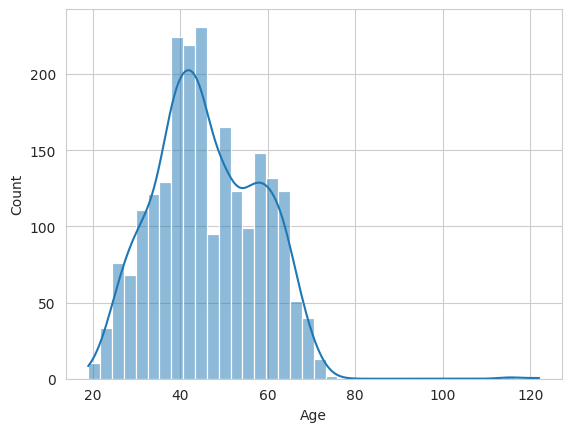

In [ ]:
import pandas as pd
import seaborn as sns

sns.histplot(df.Age, kde=True)

In [ ]:
age_bins = [0, 19, 29, 39, 49, 59, 69, 79, float('inf')]
age_labels = ['0-18', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df[['Age', 'Age_Group']]

<ipython-input-709-1f329a5a3c85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


,Age,Age_Group
0,58,50-59
1,61,60-69
2,50,50-59
3,31,30-39
4,34,30-39
...,...,...
2235,48,40-49
2236,69,70-79
2237,34,30-39
2238,59,60-69


<Axes: xlabel='Age_Group', ylabel='Count'>

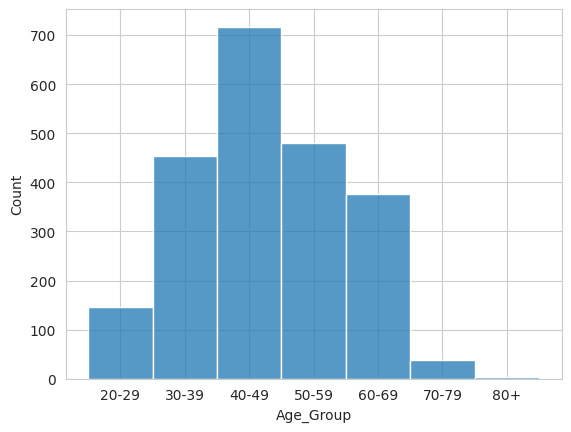

In [ ]:
sns.histplot(df.Age_Group)

#### Income Distribution

Hier noch einmal die Verteilung der Dimension Einkommen.

<Axes: xlabel='Income', ylabel='Count'>

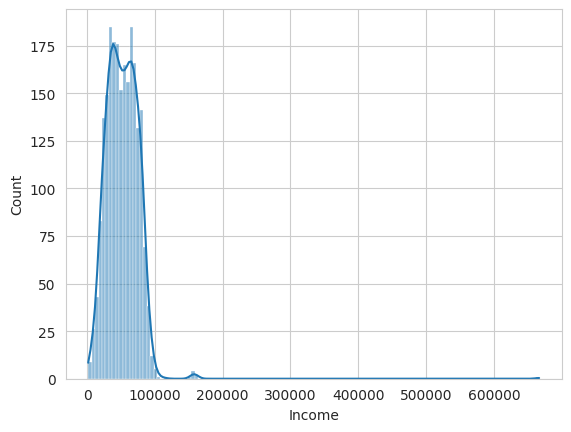

In [ ]:
sns.histplot(df.Income, kde=True)

In [ ]:
income_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 75000, 100000, float('inf')]
income_labels = ['0-9999', '10000-19999', '20000-29999', '30000-39999', '40000-49999', '50000-59999', '60000-74999', '75000-99999', '100000+']

df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

df[['Income', 'Income_Group']]

<ipython-input-712-0914ea6084b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)


,Income,Income_Group
0,58138.0,50000-59999
1,46344.0,40000-49999
2,71613.0,60000-74999
3,26646.0,20000-29999
4,58293.0,50000-59999
...,...,...
2235,61223.0,60000-74999
2236,64014.0,60000-74999
2237,56981.0,50000-59999
2238,69245.0,60000-74999


<Axes: xlabel='Income_Group', ylabel='Count'>

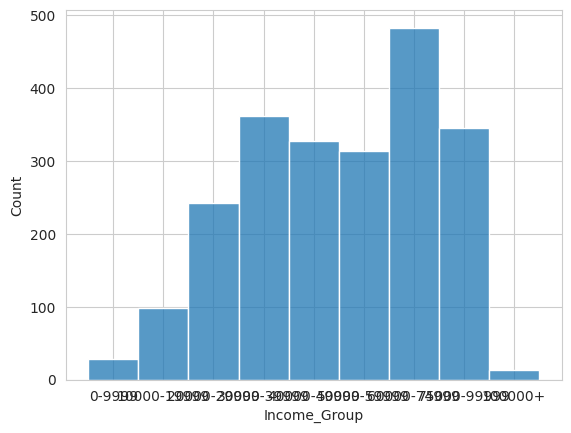

In [ ]:
sns.histplot(df.Income_Group)

#### Customer Since

Das Feld `Dt_Customer` ist ein Datumsfeld. Es angibt an, seit wann die Person Kunde ist. Das Netz braucht Zahlenwerte, daher rechne ich das Feld in eine Jahreszahl um (bezogen auf 2015, s.o.).

Die Jahreszahl ist eine Gleitkommazahl.

In [ ]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
current_date = pd.to_datetime(datetime.date(year, 1, 1))

df['Time_Difference'] = current_date - df.Dt_Customer
df['Dt_Customer_Years'] = df.Time_Difference / pd.Timedelta(days=365)

df.drop(['Time_Difference'], axis=1, inplace=True)

df[['Dt_Customer_Years', 'Dt_Customer']]

<ipython-input-714-87706198c9e3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
<ipython-input-714-87706198c9e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
<ipython-input-714-87706198c9e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Difference'] = 

,Dt_Customer_Years,Dt_Customer
0,2.731507,2012-04-09
1,0.413699,2014-08-03
2,1.364384,2013-08-21
3,0.249315,2014-10-02
4,0.950685,2014-01-19
...,...,...
2235,1.553425,2013-06-13
2236,0.238356,2014-10-06
2237,0.934247,2014-01-25
2238,0.936986,2014-01-24


<Axes: xlabel='Dt_Customer_Years', ylabel='Count'>

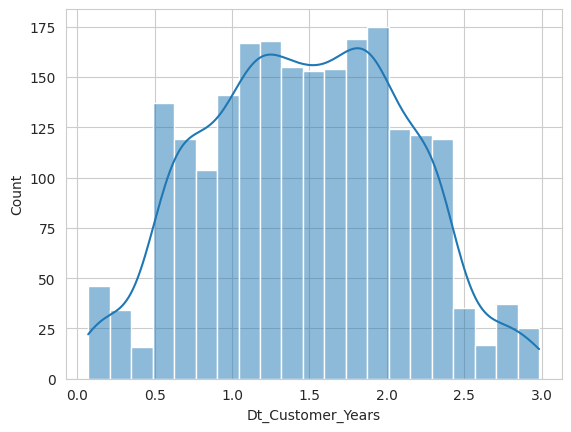

In [ ]:
sns.histplot(df.Dt_Customer_Years, kde=True)

Im Datensatz ist der Umsatz nur in einzelnen Produktkategorien angegeben (vgl. `MntWines`, `MntGold`). Ich rechne hier einen Gesamtumsatz für den Kunden aus.

In [ ]:
col_index_wines = df.columns.get_loc('MntWines')
col_index_gold = df.columns.get_loc('MntGoldProds')

mnt_df = df.iloc[:, col_index_wines:col_index_gold]
df['MntTotal'] = mnt_df.sum(axis=1)

print(df['MntTotal'])

0       1529
1         21
2        734
3         48
4        407
        ... 
2235    1094
2236     436
2237    1217
2238     782
2239     151
Name: MntTotal, Length: 2216, dtype: int64


<ipython-input-716-6b6e3b0c69f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MntTotal'] = mnt_df.sum(axis=1)


<Axes: xlabel='MntTotal', ylabel='Count'>

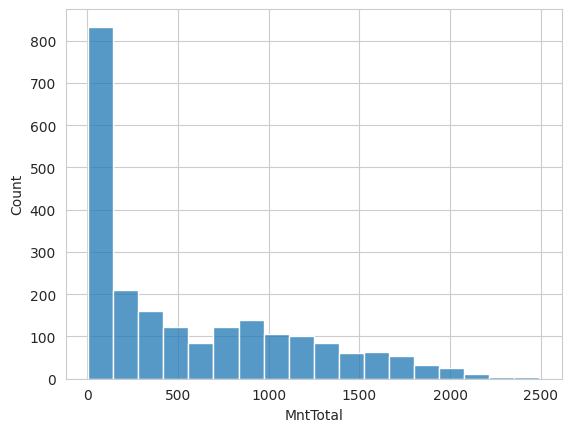

In [ ]:
sns.histplot(df['MntTotal'])

Wir wollen ja zwei Kundengruppen unterscheiden: Umsatz `< 999`, und `1000+`. Hier teile ich die Kunden anhand des oben gebildeten Gesamtumsatzes ein.

Diese Kundengruppe wird später das `Target`/Label des Trainings. Das Modell soll lernen, die Kundengruppe vorherzusagen.

In [ ]:
# customer_group_bins = [0, 100, 250, 500, 1000, 2000, float('inf')]
# customer_group_labels = ['0-99', '100-249', '250-499', '500-999', '1000 - 1999', '2000+']

customer_group_bins = [0, 1000, float('inf')]
customer_group_labels = ['0-999','1000+']

df['Customer_Group'] = pd.cut(df['MntTotal'], bins=customer_group_bins, labels=customer_group_labels, right=False)

df[['MntTotal', 'Customer_Group']]

<ipython-input-718-c47ca7960196>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Group'] = pd.cut(df['MntTotal'], bins=customer_group_bins, labels=customer_group_labels, right=False)


,MntTotal,Customer_Group
0,1529,1000+
1,21,0-999
2,734,0-999
3,48,0-999
4,407,0-999
...,...,...
2235,1094,1000+
2236,436,0-999
2237,1217,1000+
2238,782,0-999


<Axes: xlabel='Customer_Group', ylabel='Count'>

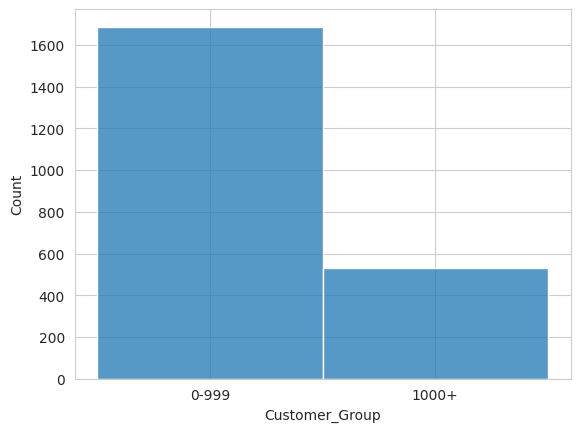

In [ ]:
sns.histplot(df['Customer_Group'])

### Convert categorical values to numeric

Wie oben schon häufiger bemerkt, mögen Modelle keine String-Werte, sondern rechnen i.d.R. mit Gleitkommazahlen. Daher ordne ich den einzelnen Gruppen im Folgenden Zahlen zu.

Das mache ich auch für `Education` und `Marital_Status`.

In [ ]:
import typing

age_map = {label: index for index, label in enumerate(age_labels)}
income_map = {label: index for index, label in enumerate(income_labels)}
customer_group_map = {label: index for index, label in enumerate(customer_group_labels)}

df['Age_Group_Numeric'] = df['Age_Group'].map(age_map).astype(int)
df['Income_Group_Numeric'] = df['Income_Group'].map(income_map)
df['Customer_Group_Numeric'] = df['Customer_Group'].map(customer_group_map).astype(int)

print(df[['Age_Group_Numeric', 'Age_Group']])
print(df[['Income_Group_Numeric', 'Income_Group']])
print(df[['Customer_Group_Numeric', 'Customer_Group']])

      Age_Group_Numeric Age_Group
0                     4     50-59
1                     5     60-69
2                     4     50-59
3                     2     30-39
4                     2     30-39
...                 ...       ...
2235                  3     40-49
2236                  6     70-79
2237                  2     30-39
2238                  5     60-69
2239                  5     60-69

[2216 rows x 2 columns]
     Income_Group_Numeric Income_Group
0                       5  50000-59999
1                       4  40000-49999
2                       6  60000-74999
3                       2  20000-29999
4                       5  50000-59999
...                   ...          ...
2235                    6  60000-74999
2236                    6  60000-74999
2237                    5  50000-59999
2238                    6  60000-74999
2239                    5  50000-59999

[2216 rows x 2 columns]
      Customer_Group_Numeric Customer_Group
0                          1  

<ipython-input-720-0174f846d836>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group_Numeric'] = df['Age_Group'].map(age_map).astype(int)
<ipython-input-720-0174f846d836>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_Group_Numeric'] = df['Income_Group'].map(income_map)
<ipython-input-720-0174f846d836>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df['Education'].unique()

education_map = {'Graduation': 0, 'Basic': 1, 'Master': 2, '2n Cycle': 2, 'PhD': 3}

def _map_education(d: pd.DataFrame):
  d['Education_Numeric'] = d['Education'].map(education_map).astype(int)

_map_education(df)

df[['Education', 'Education_Numeric']]

<ipython-input-721-e43a812d3808>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Education_Numeric'] = d['Education'].map(education_map).astype(int)


,Education,Education_Numeric
0,Graduation,0
1,Graduation,0
2,Graduation,0
3,Graduation,0
4,PhD,3
...,...,...
2235,Graduation,0
2236,PhD,3
2237,Graduation,0
2238,Master,2


<Axes: xlabel='Education', ylabel='Count'>

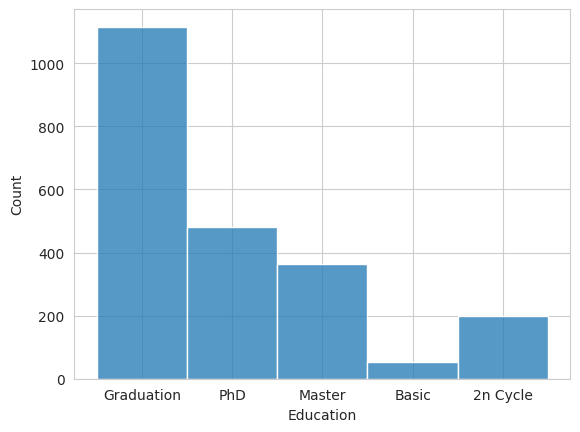

In [ ]:
sns.histplot(df['Education'])

In [ ]:
marital_status_mapping = {label: num for num, label in enumerate(df['Marital_Status'].unique(), 1)}

def _map_marital_status(d: pd.DataFrame):
  d['Marital_Status_Numeric'] = d['Marital_Status'].map(marital_status_mapping).astype(int)

_map_marital_status(df)
df[['Marital_Status', 'Marital_Status_Numeric']]

<ipython-input-723-7ea06c35faa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Marital_Status_Numeric'] = d['Marital_Status'].map(marital_status_mapping).astype(int)


,Marital_Status,Marital_Status_Numeric
0,Single,1
1,Single,1
2,Together,2
3,Together,2
4,Married,3
...,...,...
2235,Married,3
2236,Together,2
2237,Divorced,4
2238,Together,2


### Filter irrelevant columns...



In den folgenden Kapiteln nutze ich nur eine Teilmenge der Spalten, welche im Datensatz vorhanden sind (sowie der zusätzlichen Spalten, die ich gebildet habe).

Ich nutze konkret nur:

```
['Age', 'Income', 'Education_Numeric', 'Marital_Status_Numeric', 'Kidhome' 'Teenhome', 'Dt_Customer_Years']
```

Die Spalten habe ich durch mehrere Versuche mit unterschiedlichen Kombinationen und den beiden Visualisierungsverfahren (t-SNE und PCA) gefunden.

In [ ]:
print(df.columns)

# target_columns = ['ID', 'Age_Group_Numeric', 'Income_Group_Numeric', 'Education_Numeric', 'Marital_Status_Numeric', 'Kidhome',
#       'Teenhome', 'Dt_Customer_Years', 'Recency',
#       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
#       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Response']

# target_columns = ['ID', 'Age', 'Income', 'Education_Numeric', 'Marital_Status_Numeric', 'Kidhome',
#        'Teenhome', 'Dt_Customer_Years', 'Recency',
#       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
#                  'Complain', 'Z_CostContact', 'Response']

target_columns = ['Age', 'Income', 'Education_Numeric', 'Marital_Status_Numeric', 'Kidhome',
       'Teenhome', 'Dt_Customer_Years']

t_df = df[target_columns]

t_df

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Income_Group', 'Dt_Customer_Years', 'MntTotal',
       'Customer_Group', 'Age_Group_Numeric', 'Income_Group_Numeric',
       'Customer_Group_Numeric', 'Education_Numeric',
       'Marital_Status_Numeric'],
      dtype='object')


,Age,Income,Education_Numeric,Marital_Status_Numeric,Kidhome,Teenhome,Dt_Customer_Years
0,58,58138.0,0,1,0,0,2.731507
1,61,46344.0,0,1,1,1,0.413699
2,50,71613.0,0,2,0,0,1.364384
3,31,26646.0,0,2,1,0,0.249315
4,34,58293.0,3,3,1,0,0.950685
...,...,...,...,...,...,...,...
2235,48,61223.0,0,3,0,1,1.553425
2236,69,64014.0,3,2,2,1,0.238356
2237,34,56981.0,0,4,0,0,0.934247
2238,59,69245.0,2,2,0,1,0.936986


In [ ]:
print(t_df.dtypes)

Age                         int64
Income                    float64
Education_Numeric           int64
Marital_Status_Numeric      int64
Kidhome                     int64
Teenhome                    int64
Dt_Customer_Years         float64
dtype: object


Das sind nur technische Details (Laden des Datensatzes).

Ab dieser Stelle wird der Datensatz zudem transformiert, da wir die Visualisierungen mit `sklearn` und damit mit `numpy`-Arrays arbeitet.

In [ ]:
from sklearn.datasets import fetch_openml, load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

dataset = 'customer'

# Load the MNIST data

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) if dataset == 'mnist' else load_breast_cancer(as_frame=False, return_X_y=True) if dataset == 'breast_cancer' else (t_df.values, df['Customer_Group_Numeric'].values)

# Download Kaggle Data

print(X.shape)
print(y.shape)

(2216, 7)
(2216,)


An dieser Stelle könnte man für die Visualisierung theoretisch eine Stichprobe der Daten verwenden (damit man effizienter berechnen kann). Ist aber an dieser Stelle irrelevant, da unsere `SAMPLE_SIZE = 10000` größer als die Anzahl der Zeilen in unserem Datensatz ist (2216).

In [ ]:
SAMPLE_SIZE = 10000
SAMPLE_SIZE = SAMPLE_SIZE if y.shape[0] >= SAMPLE_SIZE else y.shape[0]

# Randomly select 5000 samples for performance reasons
np.random.seed(100)
subsample_idc = np.random.choice(X.shape[0], SAMPLE_SIZE, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]

### Properties

Nur ein paar technische Eigenschaften (Größe der Matrizen/Arrays).

In [ ]:
print(X.shape)
# (1000, 784)
# 1000 Samples with 784 features
print(y.shape)
# (1000,)
# 1000 labels
np.unique(y)
# array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)
# The 10 classes of the images

(2216, 7)
(2216,)


array([0, 1])

## Data Exploration

### Sample two records.

Einfach mal zwei Zeilen des Eingabedatensatzes in

In [ ]:
print(X[10, :], y[10])
print(X[15, :], y[15])

[2.90000000e+01 2.68160000e+04 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 2.37534247e+00] 0
[4.50000000e+01 2.05870000e+04 0.00000000e+00 1.00000000e+00
 1.00000000e+00 0.00000000e+00 1.56164384e-01] 0


### Embedding into two dimensions

Unser Zielvektor `0` => `0-999` und `1` => `1000+`

In [ ]:
y

array([1, 0, 1, ..., 0, 0, 0])

Wir bilden nochmal die o.g. Zahlen auf die Label ab, damit sie in der Legende des Plots richtig angezeigt werden.

In [ ]:
customer_group_inv_map = {v: k for k, v in customer_group_map.items()}
customer_group_inv_map

{0: '0-999', 1: '1000+'}

#### t-SNE

Der folgende Code rechnet eine t-SNE Visualisierung des Datensatzes aus. Dabei werden die 7-Dimensionen der Eingabetabelle (Alter, etc.) auf zwei Dimensionen reduziert. Diese 2D-Repräsentation kann man in einem Graphen darstellen.

(2216, 2)
         tsne_1     tsne_2  label label_str
0     24.942581  -0.016000      1     1000+
1    -42.336254 -17.767529      0     0-999
2     54.194725  20.501680      1     1000+
3     11.576612  16.128117      0     0-999
4     -2.947628  20.156696      0     0-999
...         ...        ...    ...       ...
2211 -14.459593  10.567891      0     0-999
2212  66.162666  -8.712053      0     0-999
2213 -37.034439 -18.638565      0     0-999
2214 -30.531250  -0.590659      0     0-999
2215   0.953161  39.280155      0     0-999

[2216 rows x 4 columns]


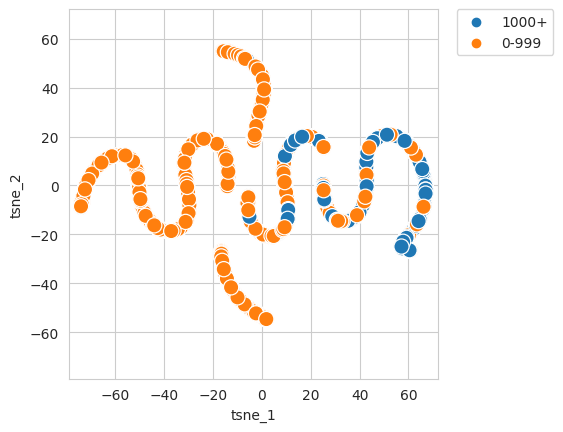

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
print(tsne_result.shape)

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

tsne_result_df['label_str'] = tsne_result_df['label'].map(customer_group_inv_map)

print(tsne_result_df)

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label_str', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In der obigen Grafik sieht man, dass es zwar eine Überlappung zwischen beiden Gruppen gibt, sich eine Vielzahl von orangenen (`0-999`) Kunden/Eingabedatensätzen aber tatsächlich auf der linken Bildhäfte befindet und die blauen `1000+`-Kunden auf der rechten Seite Platz finden.

Das legt nahe, dass es tatsächlich möglich sein wird, anhand der o.g. Eingabedaten die beiden Kundengruppen zu unterscheiden.

#### PCA

Bei der PCA handelt es sich um eine weitere Visualisierungsform, welche die Anzahl der Dimensionen reduziert.

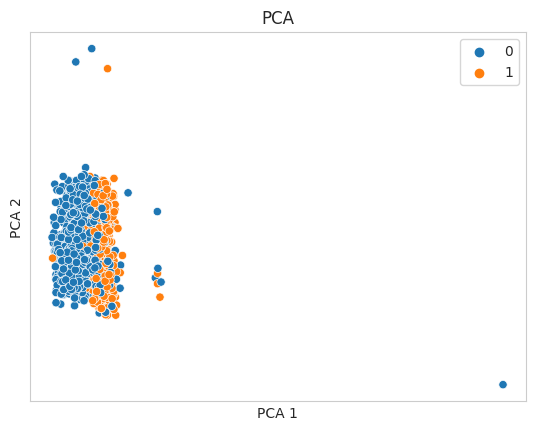

In [ ]:
import seaborn as sns
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

vecs = pca.fit_transform(X)
x0 = vecs[:, 0]
x1 = vecs[:, 1]

sns.set_style("whitegrid")
sns.scatterplot(x=x0, y=x1, hue=y)
plt.title("PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.xticks([])
plt.yticks([])
plt.show()

Auch hier ist es möglich, beide Gruppen zu unterscheiden.

Die Label sind hier `0 => 0-999` und `1 => 1000+`. Zudem sind die Farben vertauscht.

## Training

### Configure data loader

Da die o.g. Visualisierungen eine Unterscheidung der Eingabedaten anhand der ausgewählten Dimensionen erlauben, kann man nun ein Training beginnen.

Zunächst werden verschiedene Grundkonfigurationen für PyTorch vorgenommen.

In [ ]:
from torch.utils.data import Dataset

class CustomerDataset(Dataset):
  def __init__(self, X, y):
        # create feature tensors
        self.features = torch.tensor(X, dtype=torch.float32)
        # create label tensors
        self.labels = torch.tensor(y, dtype=torch.float32)
  def __len__(self):
        # we define a method to retrieve the length of the dataset
        return self.features.shape[0]
  def __getitem__(self, idx):
        # necessary override of the __getitem__ method which helps to index our data
        x = self.features[idx]
        y = self.labels[idx]
        return x, y

In [ ]:
# target_columns_training = target_columns

# training_df = df[target_columns_training]

X_training = X
y_training = y

# num_rows = X_training.shape[0]
# random_indices = np.random.permutation(num_rows)

# X_training_shuffled = X_training[random_indices]
# y_training_shuffled = y_training[random_indices]

# Calculate the index to split the data (90% for training and 10% for test)
# split_index = int(0.05 * num_rows)

# Split the arrays into training and test datasets
# X_test, X_train = np.split(X_training, [split_index])
# y_test, y_train = np.split(y_training, [split_index])

An dieser Stelle teilen wir den Datensatz in 3 Teile ein. Die Aufteilung wird automatisiert und zufällig vorgenommen:



1.   Training: Der größte Anteil der Daten (75%) fließt in den Trainingsdatensatz. Anhand dieses Datensatzes werden die Parameter des Modells beim Training optimiert. Dazu werden die Daten in das Modell gegeben, der Fehler zwischen erwarteter und tatsächlicher Ausgabe bestimmt und die Fehlerwahrscheinlichkeit über gezielte Anpassungen der Eingabeparameter minimiert. In jeder Epoche (Teilschritt des Trainings) wird der gesamte Datensatz einmal ins Modell gegeben.
2.   Validation (12.5%): Der Validierungsdatensatz wird beim Training am Ende einer jeden Epoche in das Modell gegeben. Dabei wird ebenfalls der Fehler bestimmt, das Netz wird im Anschluss aber nicht optimiert. Dadurch kann ermittelt werden, wie gut das Modells auf neuen Daten funktioniert.
3.   Test (12.5%): Wie der Validierungsdatensatz, allerdings wird dieser Datensatz am Ende des Trainings verwendet, um die Güte des Modells zu bestimmen.



In [ ]:
from sklearn import model_selection

train_ratio = 0.75
validation_ratio = 0.125
test_ratio = 0.125

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_training, y_training, test_size=1 - train_ratio)
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape, X_val.shape, X_test.shape)

(1662, 7) (277, 7) (277, 7)


Die Eingabedaten werden skaliert/normalisiert, damit große Zahlenwerte das gleiche Gewicht wie kleine Zahlenwerte haben. Ohne Normalisierung können einzelne Parameter (z.B. der sehr große Einkommenswert) beim Training überdurchschnittlich stark berücksichtigt werden.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
train_dataset = CustomerDataset(X_train_scaled, y_train)
val_dataset = CustomerDataset(X_val_scaled, y_val)
test_dataset = CustomerDataset(X_test_scaled, y_test)

In [ ]:
import torch

# X_train_tensors = torch.from_numpy(X_train).to(torch.float32)
# y_train_tensors = torch.from_numpy(y_train)

An dieser Stelle wird festgelegt, mit welcher `batch_size` trainiert wird. Bei einer `batch_size` von 16 werden immer 16 Eingabedatensätze beim Training gleichzeitig ins Netzwerk gegeben. Dadurch erhält man stabilere Ergebnisse, weil die Anpassung des Parameters durch 16 Werte geteilt wird.

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True,
    drop_last=True
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    shuffle=False,
    drop_last=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=16,
    shuffle=False,
    drop_last=True
)

### Define Neural Network

Hier wird das Herzstück (das Netzwerk) definiert. Unser Netzwerk besteht aus 2 Fully-Connected-Layern. Als Aktivierungsfunktionen verwenden wir die ReLU sowie Sigmoid-Funktion.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, num_features: int, num_classes: int):
        super().__init__()
        self.linear1 = nn.Linear(num_features, num_features ** 2)
        self.linear2 = nn.Linear(num_features ** 2, num_classes)
        # self.fc1 = nn.Linear(15, 120)
        # self.fc2 = nn.Linear(120, 32)
        # self.fc3 = nn.Linear(32, 2)
        # self.sm = nn.Softmax()

    def forward(self, x):
        logits = self.linear1(x)
        logits = self.linear2(F.relu(logits))
        probs = torch.sigmoid(logits)
        return probs

### Train network

Zwei Utility-Funktionen (eine bestimmt die Accuracy/Genauigkeit des Netzwerks, indem ein Datensatz durch das Netzwerk gejagt wird und die Anzahl der Fehler gezählt werden). Die andere plottet Graphen von Loss-Funktionen und Accuracy.

In [ ]:
import matplotlib.pyplot as plt

def compute_accuracy(model, dataloader):
    """
    This function puts the model in evaluation mode (model.eval()) and calculates the accuracy with respect to the input dataloader
    """
    model = model.eval()
    correct = 0
    total_examples = 0
    for idx, (features, labels) in enumerate(dataloader):
        with torch.no_grad():
            logits = model(features)
        predictions = torch.where(logits > 0.5, 1, 0)
        lab = labels.view(predictions.shape)
        comparison = lab == predictions

        correct += torch.sum(comparison)
        total_examples += len(comparison)
    return correct / total_examples

def plot_line_with_list(y, x_label, y_label, title):
  sns.lineplot(y=y, x=range(len(y)))
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  # Show the plot
  plt.show()

def plot_results(train_loss, val_loss, train_acc, val_acc):
  plot_line_with_list(train_loss, 'Epoch', 'Loss', 'Training: Epoch over loss')
  plot_line_with_list(val_loss, 'Epoch', 'Loss', 'Eval: Epoch over loss')
  plot_line_with_list(train_acc, 'Epoch', 'Accuracy', 'Training: Epoch over accuracy')
  plot_line_with_list(val_acc, 'Epoch', 'Accuracy', 'Eval: Epoch over accuracy')

Der eigentliche Trainingsalgorithmus. Das Training wird für 50 Epochen durchgeführt. In jeder Epoche wird der gesamte Datensatz durch das Netzwerk geschleust (in Form der o.g. Batches). Dabei wird der Fehler zwischen erwartetem und tatsächlichem Label (`0,1`) bestimmt. Anschließend wird das Netzwerk optimiert (über Stochastic Gradient Descent), sodass die Fehlerwahrscheinlichkeit abnimmt.

Als Fehlerfunktion nutzen wir einen Binary-Cross-Entropy-Loss.

Am Ende einer jeden Epoche bestimmen wir die Accuracy auf Trainings- und Validierungsdatensatz.

Epoch 01/50 | Batch 00/103 | Train Loss 0.727
Epoch 01/50 | Batch 10/103 | Train Loss 0.719
Epoch 01/50 | Batch 20/103 | Train Loss 0.634
Epoch 01/50 | Batch 30/103 | Train Loss 0.607
Epoch 01/50 | Batch 40/103 | Train Loss 0.606
Epoch 01/50 | Batch 50/103 | Train Loss 0.618
Epoch 01/50 | Batch 60/103 | Train Loss 0.540
Epoch 01/50 | Batch 70/103 | Train Loss 0.574
Epoch 01/50 | Batch 80/103 | Train Loss 0.479
Epoch 01/50 | Batch 90/103 | Train Loss 0.524
Epoch 01/50 | Batch 100/103 | Train Loss 0.601
Train accuracy: 0.77 | Val accuracy: 0.72
Epoch 02/50 | Batch 00/103 | Train Loss 0.399
Epoch 02/50 | Batch 10/103 | Train Loss 0.551
Epoch 02/50 | Batch 20/103 | Train Loss 0.508
Epoch 02/50 | Batch 30/103 | Train Loss 0.489
Epoch 02/50 | Batch 40/103 | Train Loss 0.539
Epoch 02/50 | Batch 50/103 | Train Loss 0.473
Epoch 02/50 | Batch 60/103 | Train Loss 0.470
Epoch 02/50 | Batch 70/103 | Train Loss 0.424
Epoch 02/50 | Batch 80/103 | Train Loss 0.362
Epoch 02/50 | Batch 90/103 | Train Lo

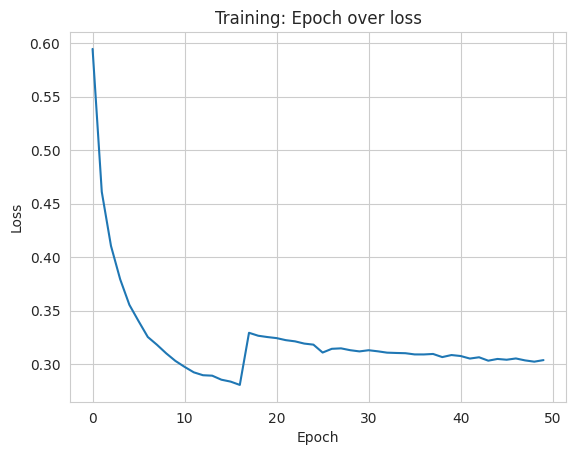

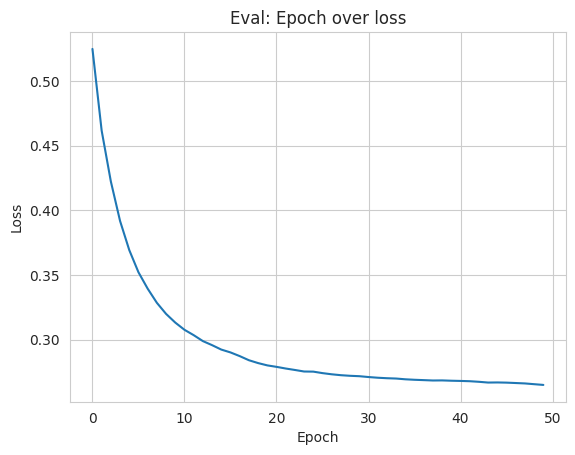

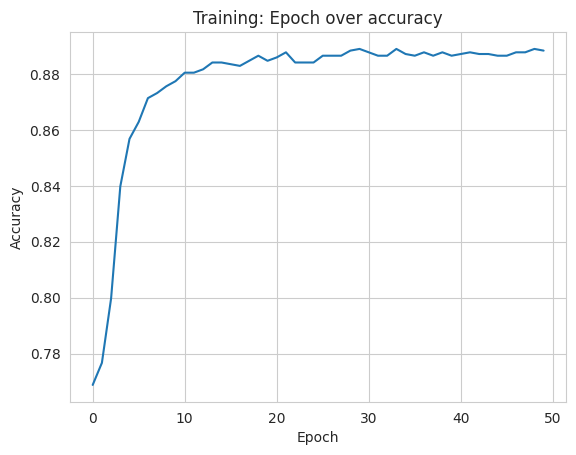

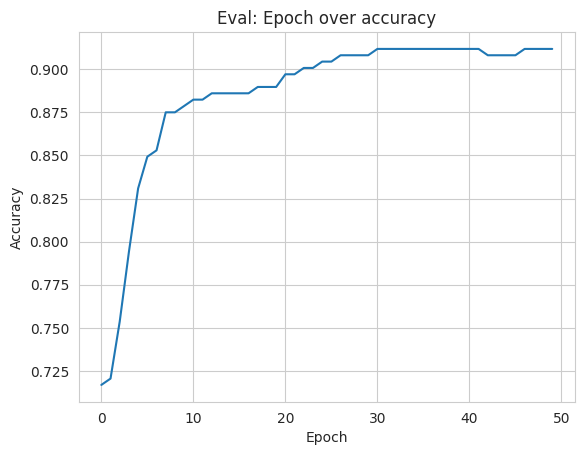

In [ ]:
n_epoch = 50

import torch.optim as optim

net = Net(X_train_scaled.shape[1], 1)

criterion = nn.BCELoss() # nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(n_epoch):  # loop over the dataset multiple times
    net = net.train()
    t_loss_list, v_loss_list = [], []

    for i, (inputs, labels) in enumerate(train_loader, 0):
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs, labels.view(outputs.shape))
        loss.backward()
        optimizer.step()

        if i % 10 == 0:
            print(
                f"Epoch {epoch+1:02d}/{n_epoch:02d}"
                f" | Batch {i:02d}/{len(train_loader):02d}"
                f" | Train Loss {loss:.3f}"
            )

        t_loss_list.append(loss.item())

    net = net.eval()
    for i, (features, labels) in enumerate(val_loader, 0):
      with torch.no_grad():
          val_probs = net(features)
          val_loss = criterion(val_probs, labels.view(outputs.shape))
          v_loss_list.append(val_loss.item())

    train_losses.append(np.mean(t_loss_list))
    val_losses.append(np.mean(v_loss_list))

    train_acc = compute_accuracy(net, train_loader)
    val_acc = compute_accuracy(net, val_loader)

    train_accs.append(train_acc.item())
    val_accs.append(val_acc.item())

    print(
        f"Train accuracy: {train_acc:.2f}"
        f" | Val accuracy: {val_acc:.2f}"
    )

print('Finished Training')
plot_results(train_losses, val_losses, train_accs, val_accs)

Die Plots am Ende zeigen den Verlauf des Fehlers (sog. Loss) sowie der Accuracy auf Trainings- sowie Validierungsdatensatz.
Beide Kurven zeigen einen typischen Verlauf: Die Lossfunktion sinkt stetig, exponential und verläuft zunehmend asymptotisch. Gleiches gilt für die Accuracy, die jedoch steigt und sich ebenfalls einer Asymptote annähert.

## Eval

An dieser Stelle kommt nun der dritte Datensatz (Test) zum Einsatz. Mit diesem können wir weitere Evaluationen durchführen.

In [ ]:
test_acc = compute_accuracy(net, test_loader)
print(f'Test Accuracy: {100*test_acc:.2f}%')

Test Accuracy: 87.87%


Die Genauigkeit auf dem ganzen Datensatz liegt bei 87.87%. Das bedeutet, wenn 100 Kunden in das Netzwerk geladen werden, liegt das Netzwerk bei knapp 88% mit der Einschätzung richtig.

Es gilt aber zu beachten, dass es sich um einen nichtbalancierten Datensatz handelt. Die Confusion Matrix im nächsten Plot legt das nahe.

<Axes: >

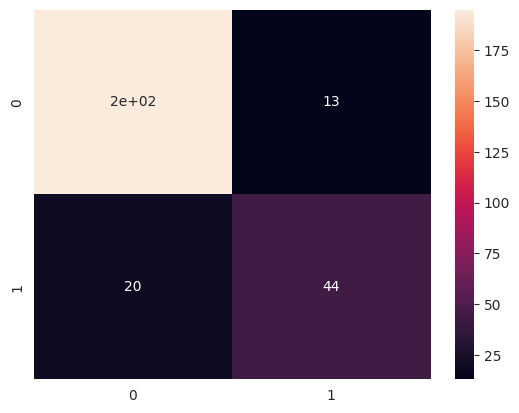

In [ ]:
from sklearn import metrics

predictions_list = []
ground_truth_list = []

net = net.eval()
for idx, (features, labels) in enumerate(test_loader):
    with torch.no_grad():
        logits = net(features)
        predictions = torch.where(logits > 0.5, 1, 0).flatten().numpy().astype(int)
        lab = labels.view(predictions.shape).flatten().numpy().astype(int)

        predictions_list.extend(predictions.tolist())
        ground_truth_list.extend(lab.tolist())

cf = metrics.confusion_matrix(ground_truth_list, predictions_list)
sns.heatmap(cf, annot=True)

Auf der Y-Achse sind die realen Werte (sog. Ground-Truth) und auf der X-Achse die Predictions abgetragen.

Die Spalte (i, j) bedeutet nun, dass das Netzwerk den Wert `j` für den realen Wert `i` vorhergesagt hat. Wir wollen also, dass möglichst viele Werte in `0,0` bzw. `1,1` stehen, da dort die richtige Zuordnung getroffen wurde.

Insgesamt waren im Testdatensatz 277 Zeilen enthalten. Davon hat unser Netzwerk:

* 200x den Wert `0-999` vergeben, als die tatsächliche Klasse auch `0-999` war => richtig
* 13x den Wert `1000+` vorhergesagt, als die tatsächliche Klasse `0-999` war => falsch
* 20x den Wert `0-999` vorhergesagt, als die tatsächliche Klasse `1000+` war => falsch
* 44 den Wert `1000+` vorhergesagt, als die tatsächliche Klasse `1000+` war => richtig

* Wenn das Netzwerk den Wert `0-999` vorhersagt, liegt es in 90% der Fälle richtig (200/(200+20))
* Wenn das Netzwerk den Wert `1000+` vorhersagt, liegt es in 77% der Fälle richtig (44/(13+44))

Das ist mit der unterschiedlichen Repräsentation beider Klassen im Datensatz zu erklären. Dadurch werden Fehler bei der Klasse `0-999` bevorzugt.

## Inference

Wir haben zwei fiktive Spender und müssen für diese folgende Parameter kennen:

* Age                         int64
* Income                    float64
* Education_Numeric           int64
* Marital_Status_Numeric      int64
* Kidhome                     int64
* Teenhome                    int64
* Dt_Customer_Years         float64


Beispiel: Justus Aurelius:
* Age: 56
* Income: 100000
* Education: Phd
* Marital: Married
* Teenhome: 2
* Kidhome: 0
* Customer since: 3

Beispiel: Chantal Meier:
* Age: 28
* Income: 25000
* Education: Graduated
* Marital: Divorced
* Teenhome: 0
* Kidhome: 3
* Customer since: 2

Wir müssen nun zunächst die o.g. Beschreibungen in Zahlenwerte übersetzen.

In [ ]:
columns = ['Age', 'Income', 'Education', 'Marital_Status', 'Teenhome', 'Kidhome', 'Dt_Customer_Years']
justus = [56, 100000, 'PhD', 'Married', 2, 0, 3]
chantal = [28, 25000, 'Graduation', 'Divorced', 0, 3, 2]

e_df = pd.DataFrame.from_dict({'0': justus, '1': chantal}, orient='index', columns=columns)
e_df

,Age,Income,Education,Marital_Status,Teenhome,Kidhome,Dt_Customer_Years
0,56,100000,PhD,Married,2,0,3
1,28,25000,Graduation,Divorced,0,3,2


In [ ]:
_map_education(e_df)
_map_marital_status(e_df)
e_df

,Age,Income,Education,Marital_Status,Teenhome,Kidhome,Dt_Customer_Years,Education_Numeric,Marital_Status_Numeric
0,56,100000,PhD,Married,2,0,3,3,3
1,28,25000,Graduation,Divorced,0,3,2,0,4


In [ ]:
e_df_training = e_df[target_columns]
e_df_training

,Age,Income,Education_Numeric,Marital_Status_Numeric,Kidhome,Teenhome,Dt_Customer_Years
0,56,100000,3,3,0,2,3
1,28,25000,0,4,3,0,2


Anschließend können wir die Werte skalieren und als Vektoren ins Netzwerk laden.

In [ ]:
X_e = scaler.transform(e_df_training.values)
X_e

array([[ 0.82226839,  1.85384743,  1.44498902,  0.45258714, -0.82327665,
         2.77223434,  2.37007532],
       [-1.50684974, -1.04171195, -0.9281056 ,  1.3812289 ,  4.74640773,
        -0.93597771,  0.802354  ]])

In [ ]:
justus_tensor, chantal_tensor = torch.tensor(X_e[0]).to(torch.float32), torch.tensor(X_e[1]).to(torch.float32)
justus_tensor

tensor([ 0.8223,  1.8538,  1.4450,  0.4526, -0.8233,  2.7722,  2.3701])

In [ ]:
output_justus, output_chantal = net(justus_tensor), net(chantal_tensor)

print(f'Justus is {output_justus.item()}')
print(f'Chantal is {output_chantal.item()}')

Justus is 0.9121240377426147
Chantal is 0.0004463727818801999


Da Justus einen Wert nahe der 1 erhält, handelt es sich voraussichtlich um einen Kunden der Gruppe `1000+`, während Chantal mit `0.000` eindeutig der Kundengruppe `0-999` zuzuordnen ist.

In [ ]:
# import torch

# X_test_tensors = torch.from_numpy(X_test).to(torch.float32)
# y_test_tensors = torch.from_numpy(y_test)

In [ ]:
# correct = 0
# total = 0

# number_of_test_examples = X_test_tensors.shape[0]

# print(number_of_test_examples)

# since we're not training, we don't need to calculate the gradients for our outputs
# with torch.no_grad():
#    for i in range(number_of_test_examples):
#        customer, test_label = X_test_tensors[i], y_test_tensors[i]
        # calculate outputs by running customers through the network
#        outputs = net(customer)
#
#        print('###')

#        print(outputs)
#        print(test_label)

        # the class with the highest energy is what we choose as prediction
#        _, predicted = torch.max(outputs.data, 0)
#        total += labels.size(0)
#        correct += (predicted == test_label).sum().item()
#        print(predicted == test_label)

# print(f'Accuracy of the network on the test customer: {100 * correct // total} %')